In [1]:
%load_ext autoreload
import gvar as gv
import lsqfit
import h5py
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
# from lqcd_analysis import visualize as plt
import visualize as plt
import scipy
import chipt
from importlib import reload

Patrick writes:

Here’s the data I’m using! The paths are:

* `bare_mat_elems` : Size (n_ops, n_ens, n_boot) = (5, 5, 50). Bootstrapped bare operators for each ensemble
* `renorm_mat_elem` : Size (n_ops, n_ens, n_boot) = (5, 5, 50). Bootstrapped renorm operators for each ensemble
* `mpi` : Size (n_ens, n_boot) = (5, 50). Bootstrapped pion masses for each ensemble (GeV)
* `fpi` : Size (n_ens, n_boot) = (5, 50). Bootstrapped fpi masses for each ensemble
* `ainv` : Size (n_ens, 2) = (5, 2). Mean and standard deviation for the inverse lattice spacing for each ensemble

The ensemble order is [‘24I/ml_0p01’, ‘24I/ml_0p005’, ‘32I/ml0p008’, ‘32I/ml0p006’, ‘32I/ml0p004’], 

The units on all quantities are GeV to the appropriate power

# Read raw data

In [2]:
# Our analysis data
# h5fname = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/chi_extrap_data.h5'

# Data with RBC/UKQCD renormalization coefficients
h5fname = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/chi_extrap_data_RBC_renorm.h5'

keys = ['bare_mat_elems', 'renorm_mat_elems', 'mpi', 'fpi', 'ainv']
data_raw = {}
with h5py.File(h5fname, 'r') as ifile:
    for key in keys:
        data_raw[key] = np.array(ifile[key])

In [3]:
for key, val in data_raw.items():
    print(key, val.shape)

bare_mat_elems (5, 5, 50)
renorm_mat_elems (5, 5, 50)
mpi (5, 50)
fpi (5, 50)
ainv (5, 2)


# Check bootstrap distributions

# Correlate the data

In [4]:
ens_labels = ['24I/ml_0p01', '24I/ml_0p005', '32I/ml0p008', '32I/ml0p006', '32I/ml0p004']

##############################################
# Fully correlated data between Oi, mpi, fpi #
##############################################

data = []
for idx_ens in range(5):
    tmp = {
        'O1': data_raw['renorm_mat_elems'][0, idx_ens, :],
        'O2': data_raw['renorm_mat_elems'][1, idx_ens, :],   
        'O3': data_raw['renorm_mat_elems'][2, idx_ens, :],   
        'O1prime': data_raw['renorm_mat_elems'][3, idx_ens, :],   
        'O2prime': data_raw['renorm_mat_elems'][4, idx_ens, :],   
        'mpi': data_raw['mpi'][idx_ens, :],
        'fpi': data_raw['fpi'][idx_ens, :],
    }
    tmp = gv.dataset.avg_data(tmp, bstrap=True)
    tmp['ainv'] = gv.gvar(*data_raw['ainv'][idx_ens, :])
    tmp['ens_label'] = ens_labels[idx_ens]
#     tmp['mpi'] = gv.dataset.avg_data(data_raw['mpi'][idx_ens, :], bstrap=True)
#     tmp['fpi'] = gv.dataset.avg_data(data_raw['fpi'][idx_ens, :], bstrap=True)
#     tmp2 = {
#         'mpi': data_raw['mpi'][idx_ens, :],
#         'fpi': data_raw['fpi'][idx_ens, :],
#     }
#     tmp2 = gv.dataset.avg_data(tmp2, bstrap=True)
#     tmp['mpi'] = tmp2['mpi']
#     tmp['fpi'] = tmp2['fpi']
    data.append(tmp)
    
data = pd.DataFrame(data)    
data['ns'] = data['ens_label'].apply(lambda astr: int(astr.split('/')[0].rstrip('I')))
display(data)

##################################################
# Partially correlated data between Oi, mpi, fpi #
##################################################

data2 = []
for idx_ens in range(5):
    tmp = {
        'O1': data_raw['renorm_mat_elems'][0, idx_ens, :],
        'O2': data_raw['renorm_mat_elems'][1, idx_ens, :],   
        'O3': data_raw['renorm_mat_elems'][2, idx_ens, :],   
        'O1prime': data_raw['renorm_mat_elems'][3, idx_ens, :],   
        'O2prime': data_raw['renorm_mat_elems'][4, idx_ens, :],   
#         'mpi': data_raw['mpi'][idx_ens, :],
#         'fpi': data_raw['fpi'][idx_ens, :],
    }
    tmp = gv.dataset.avg_data(tmp, bstrap=True)
    tmp['ainv'] = gv.gvar(*data_raw['ainv'][idx_ens, :])
    tmp['ens_label'] = ens_labels[idx_ens]
#     tmp['mpi'] = gv.dataset.avg_data(data_raw['mpi'][idx_ens, :], bstrap=True)
#     tmp['fpi'] = gv.dataset.avg_data(data_raw['fpi'][idx_ens, :], bstrap=True)
    tmp2 = {
        'mpi': data_raw['mpi'][idx_ens, :],
        'fpi': data_raw['fpi'][idx_ens, :],
    }
    tmp2 = gv.dataset.avg_data(tmp2, bstrap=True)
    tmp['mpi'] = tmp2['mpi']
    tmp['fpi'] = tmp2['fpi']
    data2.append(tmp)
    
data2 = pd.DataFrame(data2)    
data2['ns'] = data2['ens_label'].apply(lambda astr: int(astr.split('/')[0].rstrip('I')))
display(data2)






,O1,O1prime,O2,O2prime,O3,ainv,ens_label,fpi,mpi,ns
0,-0.01839(43),-0.0848(13),-0.04746(64),0.01692(21),0.001629(21),1.7840(50),24I/ml_0p01,0.16367(68),0.4309(15),24
1,-0.01545(43),-0.0728(13),-0.03967(71),0.01417(21),0.000827(11),1.7840(50),24I/ml_0p005,0.15161(65),0.3414(12),24
2,-0.02057(71),-0.0877(18),-0.04498(87),0.01508(31),0.001414(24),2.3820(80),32I/ml0p008,0.1620(10),0.4113(23),32
3,-0.01808(60),-0.0781(17),-0.03988(72),0.01341(24),0.000956(17),2.3820(80),32I/ml0p006,0.15428(75),0.3591(17),32
4,-0.01618(69),-0.0707(17),-0.03591(81),0.01210(29),0.000580(10),2.3820(80),32I/ml0p004,0.14763(87),0.3014(16),32


,O1,O1prime,O2,O2prime,O3,ainv,ens_label,fpi,mpi,ns
0,-0.01839(43),-0.0848(13),-0.04746(64),0.01692(21),0.001629(21),1.7840(50),24I/ml_0p01,0.16367(68),0.4309(15),24
1,-0.01545(43),-0.0728(13),-0.03967(71),0.01417(21),0.000827(11),1.7840(50),24I/ml_0p005,0.15161(65),0.3414(12),24
2,-0.02057(71),-0.0877(18),-0.04498(87),0.01508(31),0.001414(24),2.3820(80),32I/ml0p008,0.1620(10),0.4113(23),32
3,-0.01808(60),-0.0781(17),-0.03988(72),0.01341(24),0.000956(17),2.3820(80),32I/ml0p006,0.15428(75),0.3591(17),32
4,-0.01618(69),-0.0707(17),-0.03591(81),0.01210(29),0.000580(10),2.3820(80),32I/ml0p004,0.14763(87),0.3014(16),32


# Check structure of correlation matrix

<AxesSubplot:>

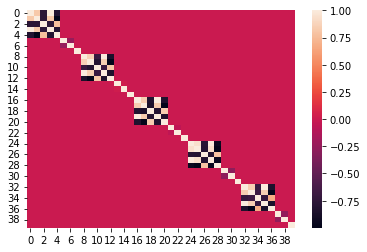

In [5]:
# Check that full 40 x 40 correlation matrix is block diagonal
cols = ['O1', 'O2', 'O3', 'O1prime', 'O2prime', 'mpi', 'fpi', 'ainv']
tmp = []
for _, row in data2.iterrows():
    for col in cols:
        tmp.append(row[col])
sns.heatmap(gv.evalcorr(tmp))

# Plot operators 

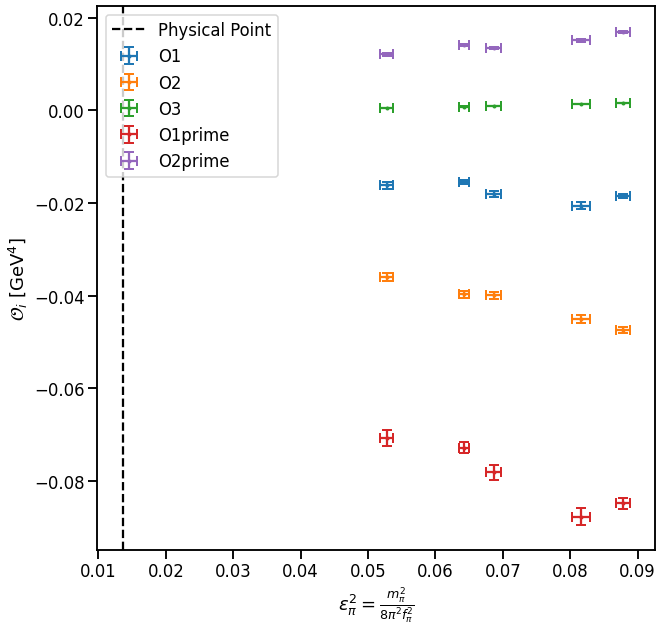

In [6]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize=(10,10))
    kwargs = {'markeredgewidth':2, 'capsize': 5, 'fmt': '.', 'ms': 4}
    for col in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']:
        y = data[col]
        #x = data['mpi'] / (4 * np.pi * data['fpi'])
        x = data['mpi'] / (2 * np.sqrt(2) * np.pi * data['fpi'])
        x = x**2
        plt.errorbar(ax, x, y, label=col, **kwargs)



    mpi_pdg = 0.1349768 # MeV
    fpi_pdg = 0.1302    # MeV
    #ax.axvline(x=(mpi_pdg/(4*np.pi*fpi_pdg))**2, color='k', ls='--', label='Physical Point')
    ax.axvline(x=(mpi_pdg/(2*np.sqrt(2)*np.pi*fpi_pdg))**2, color='k', ls='--', label='Physical Point')
       
    #ax.set_xlabel(r"$\epsilon_\pi^2 = \left(\frac{m_\pi}{4\pi f_\pi}\right)^2$")
    ax.set_xlabel(r"$\epsilon_\pi^2 = \frac{m_\pi^2}{8\pi^2 f_\pi^2}$")        
    ax.set_ylabel(r"$\mathcal{O}_i$ [GeV$^4$]")
    ax.legend(loc=0)
    

# Wrangle data for fit 

In [7]:
reload(chipt)

<module 'chipt' from '/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py'>

########################################
Least Square Fit:
  chi2/dof [dof] = 0.014 [5]    Q = 1    logGBF = 18.514

Parameters:
          mpi 0    0.4310 (15)      [  0.4309 (15) ]  
              1    0.3413 (11)      [  0.3414 (12) ]  
              2    0.4113 (20)      [  0.4113 (23) ]  
              3    0.3589 (12)      [  0.3591 (17) ]  
              4    0.3016 (14)      [  0.3014 (16) ]  
          fpi 0   0.16364 (66)      [ 0.16367 (68) ]  
              1   0.15163 (63)      [ 0.15161 (65) ]  
              2   0.16205 (94)      [  0.1620 (10) ]  
              3   0.15432 (69)      [ 0.15428 (75) ]  
              4   0.14758 (84)      [ 0.14763 (87) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1762 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha     -0.48 (15)      [       0 

/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: R

########################################
Least Square Fit:
  chi2/dof [dof] = 0.035 [5]    Q = 1    logGBF = 16.032

Parameters:
          mpi 0    0.4310 (15)      [  0.4309 (15) ]  
              1    0.3413 (11)      [  0.3414 (12) ]  
              2    0.4113 (21)      [  0.4113 (23) ]  
              3    0.3589 (13)      [  0.3591 (17) ]  
              4    0.3017 (14)      [  0.3014 (16) ]  
          fpi 0   0.16361 (64)      [ 0.16367 (68) ]  
              1   0.15165 (61)      [ 0.15161 (65) ]  
              2   0.16203 (87)      [  0.1620 (10) ]  
              3   0.15438 (62)      [ 0.15428 (75) ]  
              4   0.14751 (77)      [ 0.14763 (87) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1762 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha      0.24 (15)      [       0 

/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: R

########################################
Least Square Fit:
  chi2/dof [dof] = 0.69 [5]    Q = 0.63    logGBF = 34.67

Parameters:
          mpi 0    0.4308 (15)      [  0.4309 (15) ]  
              1    0.3414 (12)      [  0.3414 (12) ]  
              2    0.4110 (22)      [  0.4113 (23) ]  
              3    0.3589 (17)      [  0.3591 (17) ]  
              4    0.3011 (16)      [  0.3014 (16) ]  
          fpi 0   0.16364 (68)      [ 0.16367 (68) ]  
              1   0.15173 (64)      [ 0.15161 (65) ]  
              2    0.1621 (10)      [  0.1620 (10) ]  
              3   0.15422 (75)      [ 0.15428 (75) ]  
              4   0.14775 (86)      [ 0.14763 (87) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1763 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha     0.077 (82)      [       0

/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:142: RuntimeWarning: divide by zero encountered in log
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:142: RuntimeWarning: invalid value encountered in multiply
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:142: RuntimeWarning: divide by zero encountered in log
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:142: RuntimeWarning: invalid value encountered in multiply
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:142: RuntimeWarning: divide by zero encountered in log
  result = 1 + eps2 * (3*np.log(eps2) - 1 + c)
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:142: RuntimeWarning: invalid value encountered in multip

########################################
Least Square Fit:
  chi2/dof [dof] = 0.09 [5]    Q = 0.99    logGBF = 12.927

Parameters:
          mpi 0    0.4311 (15)      [  0.4309 (15) ]  
              1    0.3413 (11)      [  0.3414 (12) ]  
              2    0.4112 (21)      [  0.4113 (23) ]  
              3    0.3589 (12)      [  0.3591 (17) ]  
              4    0.3017 (14)      [  0.3014 (16) ]  
          fpi 0   0.16358 (64)      [ 0.16367 (68) ]  
              1   0.15169 (61)      [ 0.15161 (65) ]  
              2   0.16209 (87)      [  0.1620 (10) ]  
              3   0.15437 (63)      [ 0.15428 (75) ]  
              4   0.14749 (78)      [ 0.14763 (87) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1762 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha     -0.12 (14)      [       

/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: R

########################################
Least Square Fit:
  chi2/dof [dof] = 0.038 [5]    Q = 1    logGBF = 20.442

Parameters:
          mpi 0    0.4311 (15)      [  0.4309 (15) ]  
              1    0.3413 (11)      [  0.3414 (12) ]  
              2    0.4112 (21)      [  0.4113 (23) ]  
              3    0.3589 (13)      [  0.3591 (17) ]  
              4    0.3018 (14)      [  0.3014 (16) ]  
          fpi 0   0.16359 (63)      [ 0.16367 (68) ]  
              1   0.15168 (61)      [ 0.15161 (65) ]  
              2   0.16206 (88)      [  0.1620 (10) ]  
              3   0.15438 (62)      [ 0.15428 (75) ]  
              4   0.14748 (77)      [ 0.14763 (87) ]  
           a2 0    0.3142 (18)      [  0.3142 (18) ]  
              1    0.3142 (18)      [  0.3142 (18) ]  
              2    0.1762 (12)      [  0.1762 (12) ]  
              3    0.1763 (12)      [  0.1762 (12) ]  
              4    0.1762 (12)      [  0.1762 (12) ]  
          alpha      0.60 (17)      [       0 

/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: R

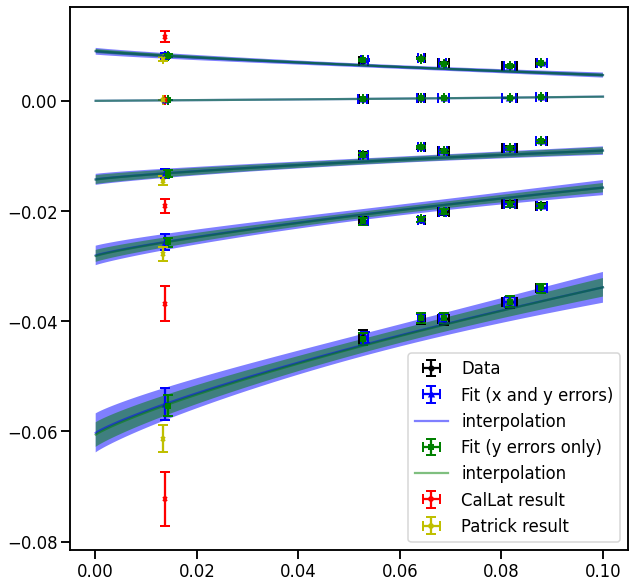

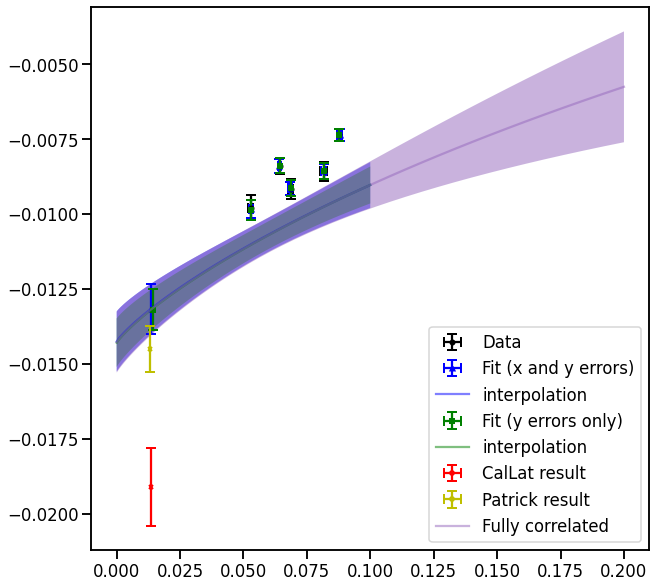

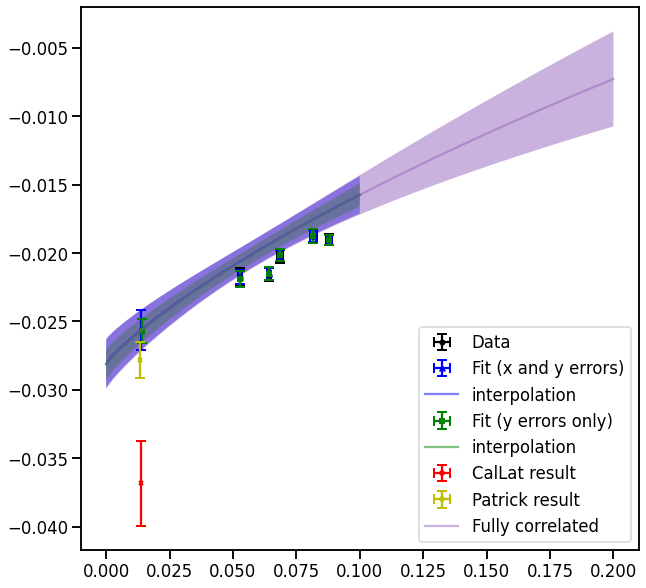

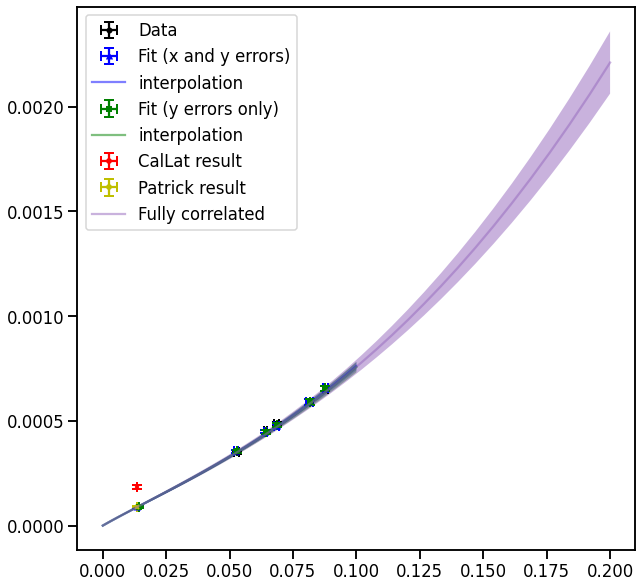

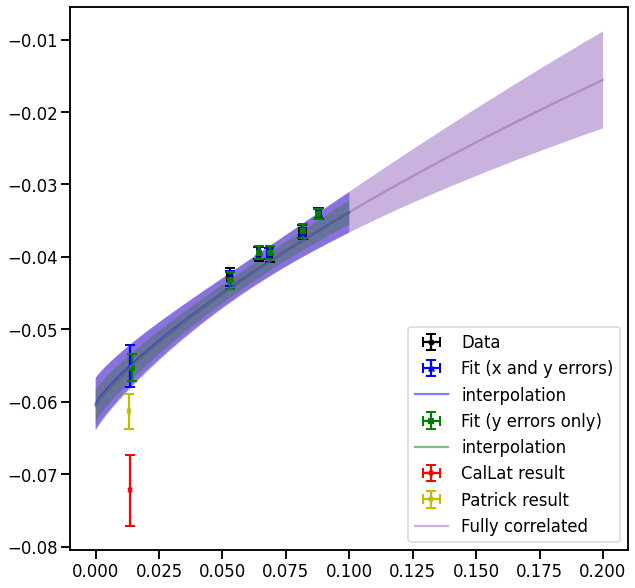

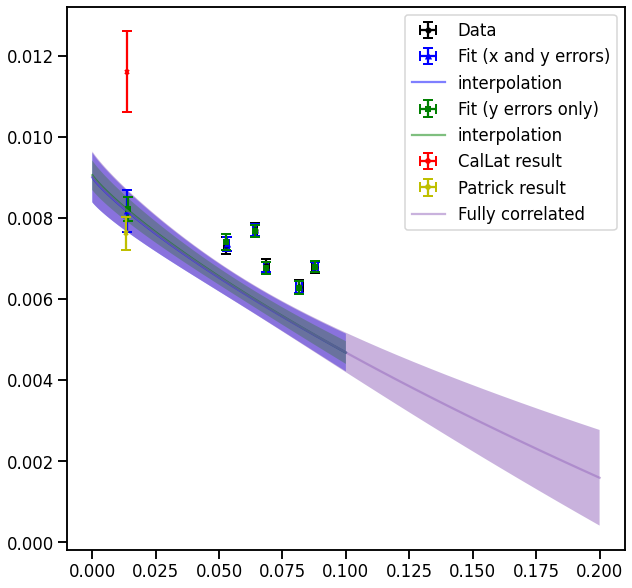

In [11]:
fitter = chipt.ChiralFitter(data)
fitter2 = chipt.ChiralFitter(data2)
results = {}
fits = {}
fit_bands = {}
with sns.plotting_context("talk"):
    fig_all, ax_all = plt.subplots(1, figsize=(10, 10))

    for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']:
        fitter(key, prior_width=10.0)
        fitter2(key, prior_width=10.0)
        print("#"*40)
        print(fitter.fit_full)
#         print(fitter2.fit_full)
        print(key, fitter.evaluate_at_physical_point('full'))
        results[key] = fitter.evaluate_at_physical_point('full')
        fits[key] = fitter.fit_full
        
        fig, ax = plt.subplots(1, figsize=(10,10))
        fitter.plot_results(key, ax)
        
        # Interpolation
        if key == 'O3':
            fctm = chipt.F3ctm
        else:
            fctm = chipt.Fctm
        x = {
            'lam_chi': (np.sqrt(2) * 2 * np.pi) * (fitter2._pdg['fpi']),
            'eps_pi': np.linspace(0, np.sqrt(0.2)),
        }
        p = {key: fitter2.fit_full.p[key] for key in ['alpha', 'beta', 'c']}
        y = fctm(x, p)
        fit_bands[key] = y
        plt.errorbar(ax, x['eps_pi']**2, y, color=sns.color_palette()[4],
                     bands=True, alpha=0.5, label='Fully correlated')
        
        
              
        
        fitter.plot_results(key, ax_all)
        ax.legend(loc=0)
        if key == 'O1':
            ax_all.legend(loc=0)


In [9]:
inputs={    
    'data': fitter.fit_full.y,
    'mpi': fitter.fit_full.prior['mpi'],
    'fpi': fitter.fit_full.prior['fpi'],
    'a2':  fitter.fit_full.prior['a2'],
    'alpha': fitter.fit_full.prior['alpha'],
    'beta': fitter.fit_full.prior['beta'],
    'c': fitter.fit_full.prior['c'],        
}
outputs={'O_n:physical': fitter.evaluate_at_physical_point('full')}

    
print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))


inputs={    
    'data': fitter.fit.y,
    'alpha': fitter.fit.prior['alpha'],
    'beta': fitter.fit.prior['beta'],
    'c': fitter.fit.prior['c'],        
}
outputs={'O_n:physical': fitter.evaluate_at_physical_point('basic')}

    
print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))




Partial % Errors:
           O_n:physical
-----------------------
     data:         6.22
      mpi:         6.22
      fpi:         6.22
       a2:         0.25
    alpha:         0.06
     beta:         0.03
        c:         0.22
-----------------------
    total:         6.22

Partial % Errors:
           O_n:physical
-----------------------
     data:         3.68
    alpha:         0.02
     beta:         0.01
        c:         0.08
-----------------------
    total:         3.68



/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_43176/2528231940.py:13: UserWarning: data and mpi double count errors
  print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_43176/2528231940.py:13: UserWarning: data and fpi double count errors
  print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_43176/2528231940.py:13: UserWarning: mpi and fpi double count errors
  print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_43176/2528231940.py:13: UserWarning: O_n:physical partial error 0.0008799649303732064  !=  total error 0.0005085480271956288
  print(gv.fmt_errorbudget(inputs=inputs, outputs=outputs, verify=True))


/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: divide by zero encountered in log
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))
/Users/theoares/lqcd/0nubb/python_scripts/will_chiextrap_code/chipt.py:102: RuntimeWarning: invalid value encountered in multiply
  result = (1 + eps_pi**2 * (np.log(eps_pi**2) - 1 + c))


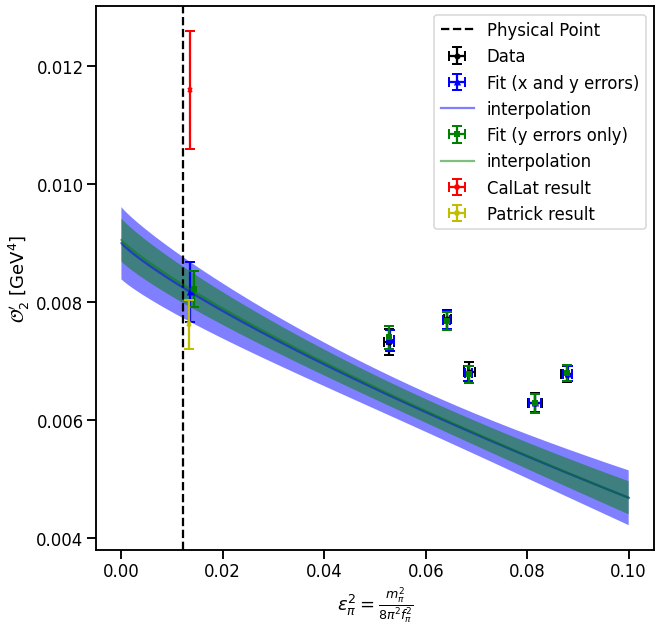

In [10]:
with sns.plotting_context("talk"):
    fig, ax = plt.subplots(1, figsize=(10,10))
    fitter.plot_results(key, ax)
    ax.legend(loc=0)
        
    ax.set_xlabel(r"$\epsilon_\pi^2 = \frac{m_\pi^2}{8\pi^2 f_\pi^2}$")        
    ax.set_ylabel(r"$\mathcal{O}_2'$ [GeV$^4$]")


    mpi_pdg = 0.1349768 # MeV
    fpi_pdg = 0.1302    # MeV
    ax.axvline(x=(mpi_pdg/(np.sqrt(2)*2*np.pi*fpi_pdg))**2*0.90, color='k', ls='--', label='Physical Point')

    ax.legend(loc=0)
    fig.savefig("/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/plots/chiral_extrap/will_chi_extrap/chiral_continuum_o2prime.pdf")
    

# Generate plots for paper

In [11]:
import sys

sys.path.append('..')
from utils import *

sys.path.append('/Users/theoares/lqcd/utilities')
from formattools import *

# use CMU Serif
import matplotlib as mpl
import matplotlib.font_manager as font_manager
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext'] = True
import matplotlib.pyplot as pyplt

n_ens = 5
n_ops = 5
ensembles = ['24I/ml_0p01', '24I/ml_0p005', '32I/ml0p008', '32I/ml0p006', '32I/ml0p004']
labels = ['O1', 'O2', 'O3', 'O1p', 'O2p']
latex_labels = ['\\mathcal{O}_1', '\\mathcal{O}_2', '\\mathcal{O}_3', '\\mathcal{O}_{1\'}', '\\mathcal{O}_{2\'}']

In [12]:
data2['lam_chi'] = 2 * np.sqrt(2) * np.pi * data2['fpi']
data2['eps_sq'] = data2['mpi']**2 / (8 * (np.pi**2) * (data2['fpi']**2))
data2['eps_sq_phys'] = data2['mpi']**2 / (8 * (np.pi**2) * (fitter2._pdg['fpi']**2))

In [13]:
data2

,O1,O1prime,O2,O2prime,O3,ainv,ens_label,fpi,mpi,ns,lam_chi,eps_sq,eps_sq_phys
0,-0.02183(48),-0.0975(14),-0.05362(69),0.01594(23),0.001842(23),1.7840(50),24I/ml_0p01,0.16367(68),0.4309(15),24,1.4543(61),0.0878(11),0.13875(99)
1,-0.01836(48),-0.0836(14),-0.04481(77),0.01336(23),0.000935(12),1.7840(50),24I/ml_0p005,0.15161(65),0.3414(12),24,1.3471(58),0.06423(70),0.08708(60)
2,-0.02364(81),-0.1002(20),-0.05062(96),0.01436(36),0.001602(27),2.3820(80),32I/ml0p008,0.1620(10),0.4113(23),32,1.4399(89),0.0816(14),0.1264(14)
3,-0.02078(69),-0.0892(18),-0.04488(80),0.01277(27),0.001084(19),2.3820(80),32I/ml0p006,0.15428(75),0.3591(17),32,1.3709(67),0.0686(11),0.09635(91)
4,-0.01859(78),-0.0808(19),-0.04042(90),0.01152(34),0.000657(12),2.3820(80),32I/ml0p004,0.14763(87),0.3014(16),32,1.3118(77),0.05280(95),0.06788(74)


In [14]:
fits['O1'].p

BufferDict([('mpi', array([0.4311(15), 0.3413(11), 0.4112(20), 0.3589(12), 0.3017(14)],
      dtype=object)), ('fpi', array([0.16363(66), 0.15164(63), 0.16206(94), 0.15432(69), 0.14757(84)],
      dtype=object)), ('a2', array([0.3142(18), 0.3142(18), 0.1762(12), 0.1762(12), 0.1762(12)],
      dtype=object)), ('alpha', -0.35(16)), ('beta', -1.42(10)), ('c', -0.50(73))])

In [15]:
O_phys_mu = [results[key].mean for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']]
O_phys_sigma = [results[key].sdev for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']]
epsilon_sq_range = x['eps_pi'][1:]**2
band_data_mu = [gv.mean(fit_bands[key][1:]) for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']]
band_data_sigma = [gv.sdev(fit_bands[key][1:]) for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']]

# construct subtracted matrix elements
eps_sq = np.array(data2['eps_sq'])
eps_sq_mu = gv.mean(eps_sq)
eps_sq_sigma = gv.sdev(eps_sq)
eps_sq_sub = np.array(data2['eps_sq_phys'])
eps_sq_sub_mu = gv.mean(eps_sq_sub)
eps_sq_sub_sigma = gv.sdev(eps_sq_sub)
mat_elems_raw = np.array([data2[key] for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']])
mat_elems_sub = np.zeros(mat_elems_raw.shape, dtype = object)
for k, key in enumerate(['O1', 'O2', 'O3', 'O1prime', 'O2prime']):
    fn = chipt.F if key in ['O1', 'O2', 'O1prime', 'O2prime'] else chipt.F3
    xx = {'L' : np.array(data2['ns'])}
    xx_cont = {'L' : np.array([-1, -1, -1, -1, -1])}
    p_cont = {
        'mpi' : fits[key].p['mpi'], 
        'alpha' : fits[key].p['alpha'], 
        'beta' : fits[key].p['beta'], 
        'c' : fits[key].p['c'], 
        'fpi' : np.array([fitter2._pdg['fpi']] * n_ens),
        'a2' : np.array([0.0] * n_ens)
    }
    mat_elems_sub[k] = mat_elems_raw[k] - fn(xx, fits[key].p) + fn(xx_cont, p_cont)
mat_elems_sub_mu = gv.mean(mat_elems_sub)
mat_elems_sub_sigma = gv.sdev(mat_elems_sub)
mat_elems_mu = gv.mean(mat_elems_raw)
mat_elems_sigma = gv.sdev(mat_elems_raw)

In [16]:
mat_elems_sub

array([[-0.0083(14), -0.0106(12), -0.0088(13), -0.0102(10), -0.0114(11)],
       [-0.0136(24), -0.0191(19), -0.0149(22), -0.0181(16), -0.0211(16)],
       [0.001379(50), 0.000723(25), 0.001200(39), 0.000838(26),
        0.000521(17)],
       [-0.0295(49), -0.0416(38), -0.0324(44), -0.0394(35), -0.0459(33)],
       [0.00331(74), 0.00499(59), 0.00371(68), 0.00470(51), 0.00558(52)]],
      dtype=object)

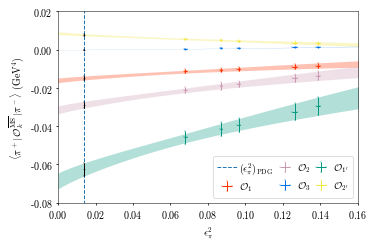

In [17]:
# plot the extrapolation
eps_sq_0 = fitter2._pdg['mpi'] ** 2 / (8 * (np.pi ** 2) * (fitter2._pdg['fpi'] ** 2))
markers = ['o', 'v', '^', '_', 'x']
style = styles['prd_twocol*']
labels = ['$\mathcal{O}_1$', '$\mathcal{O}_2$', '$\mathcal{O}_3$', '$\mathcal{O}_{1\'} $', '$\mathcal{O}_{2\'} $']
with sns.plotting_context('paper'):
    asp_ratio = 3/2
    pyplt.figure(figsize = (0.75*style['colwidth'], 0.75*style['colwidth'] / asp_ratio))
    for j in range(n_ops):
        _, caps, _ = pyplt.errorbar(eps_sq_sub_mu, np.array(mat_elems_sub_mu[j]), xerr = eps_sq_sub_sigma, yerr = mat_elems_sub_sigma[j], \
                    c = colors[j], fmt = markers[j], label = labels[j], capsize = style['endcaps'], elinewidth = style['ebar_width'], \
                    markersize = style['markersize'])
        #pyplt.fill_between(epsilon_sq_range[1:], np.array(band_data_mu[j]) + band_data_sigma[j], np.array(band_data_mu[j]) - band_data_sigma[j], \
        #                color = colors[j], alpha = 0.3, linewidth = 0.1)
        pyplt.fill_between(epsilon_sq_range, np.array(band_data_mu[j]) + band_data_sigma[j], np.array(band_data_mu[j]) - band_data_sigma[j], \
                        color = colors[j], alpha = 0.3, linewidth = 0.1)
        for cap in caps:
            cap.set_markeredgewidth(style['ecap_width'])
    pyplt.vlines(eps_sq_0, -0.1, 0.02, linestyles = 'dashed', label = '$(\epsilon^2_\pi)_{\mathrm{PDG}}$', linewidth = style['ebar_width'])
    _, caps, _ = pyplt.errorbar([eps_sq_0, eps_sq_0, eps_sq_0, eps_sq_0, eps_sq_0], np.array(O_phys_mu), yerr = O_phys_sigma, \
                 c = 'k', fmt = markers[j], capsize = style['endcaps'], markersize = style['markersize'], elinewidth = style['ebar_width'])
    for cap in caps:
        cap.set_markeredgewidth(style['ecap_width'])
    pyplt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower right', prop={'size': style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
    pyplt.xlim((0.0, 0.16))
    pyplt.ylim((-0.08, 0.02))
    pyplt.xticks(fontsize = style['fontsize'])
    pyplt.yticks(fontsize = style['fontsize'])
    pyplt.xlabel('$\epsilon_\pi^2$', fontsize = style['fontsize'])
    pyplt.ylabel('$\\langle \pi^+| \, \mathcal{O}_k^{\overline{\mathrm{MS}}} \, |\pi^- \\rangle$ (GeV$^4$)', fontsize = style['fontsize'])
    ax = pyplt.gca()
    ax.xaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'])
    ax.yaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'])
    for spine in spinedirs:
        ax.spines[spine].set_linewidth(style['axeswidth'])
    pyplt.tight_layout()
    pyplt.savefig('/Users/theoares/Dropbox (MIT)/research/0nubb/paper/plots/renorm_chiral_extrap_FINAL.pdf', bbox_inches='tight')
    pyplt.show()

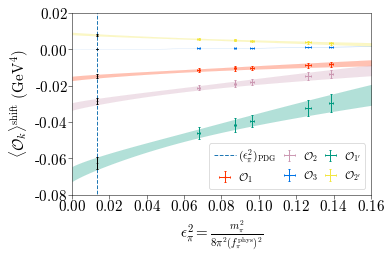

In [18]:
# plot the extrapolation
style = styles['talk']
with sns.plotting_context('paper'):
    asp_ratio = 3/2
    pyplt.figure(figsize = (style['colwidth'], style['colwidth'] / asp_ratio))
    for j in range(n_ops):
        _, caps, _ = pyplt.errorbar(eps_sq_sub_mu, np.array(mat_elems_sub_mu[j]), xerr = eps_sq_sub_sigma, yerr = mat_elems_sub_sigma[j], \
                    c = colors[j], fmt = markers[j], label = labels[j], capsize = style['endcaps'], elinewidth = style['ebar_width'], \
                    markersize = style['markersize'])
        pyplt.fill_between(epsilon_sq_range, np.array(band_data_mu[j]) + band_data_sigma[j], np.array(band_data_mu[j]) - band_data_sigma[j], \
                        color = colors[j], alpha = 0.3, linewidth = 0.1)
        for cap in caps:
            cap.set_markeredgewidth(style['ecap_width'])
    pyplt.vlines(eps_sq_0, -0.1, 0.02, linestyles = 'dashed', label = '$(\epsilon^2_\pi)_{\mathrm{PDG}}$', linewidth = style['ebar_width'])
    _, caps, _ = pyplt.errorbar([eps_sq_0, eps_sq_0, eps_sq_0, eps_sq_0, eps_sq_0], np.array(O_phys_mu), yerr = O_phys_sigma, \
                 c = 'k', fmt = markers[j], capsize = style['endcaps'], markersize = style['markersize'], elinewidth = style['ebar_width'])
    for cap in caps:
        cap.set_markeredgewidth(style['ecap_width'])
    pyplt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower right', prop={'size': 0.75*style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
    pyplt.xlim((0.0, 0.16))
    pyplt.ylim((-0.08, 0.02))
    pyplt.xticks(fontsize = style['fontsize'])
    pyplt.yticks(fontsize = style['fontsize'])
    pyplt.xlabel(r'$\epsilon_\pi^2 = \frac{m_\pi^2}{8\pi^2 (f_\pi^{\mathrm{phys}})^2}$', fontsize = style['fontsize'])
    #pyplt.ylabel('$\\langle \pi^+| \, \mathcal{O}_k^{\overline{\mathrm{MS}}} \, |\pi^- \\rangle$ (GeV$^4$)', fontsize = style['fontsize'])
    pyplt.ylabel('$\\langle \mathcal{O}_k \\rangle^{\mathrm{shift}}$ (GeV$^4$)', fontsize = style['fontsize'])
    ax = pyplt.gca()
    ax.xaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'], pad = style['bottom_pad'])
    ax.yaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'], pad = style['left_pad'])
    for spine in spinedirs:
        ax.spines[spine].set_linewidth(style['axeswidth'])
    pyplt.tight_layout()
    pyplt.savefig('/Users/theoares/Dropbox (MIT)/research/0nubb/paper/plots/renorm_chiral_extrap_TALK.pdf', bbox_inches='tight')
    pyplt.show()

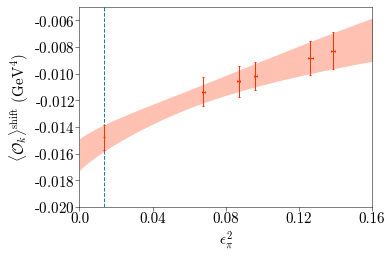

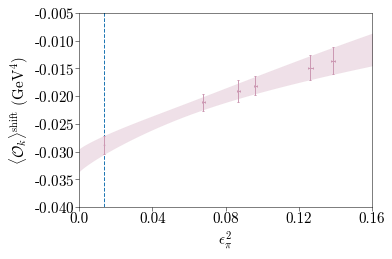

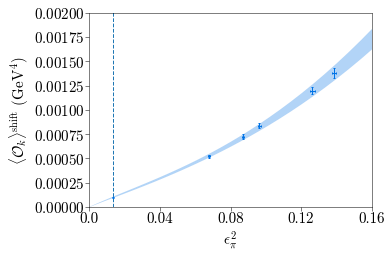

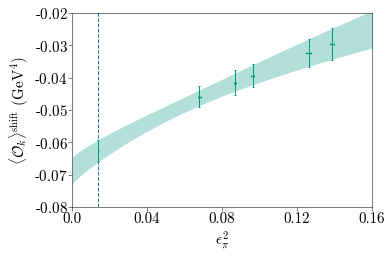

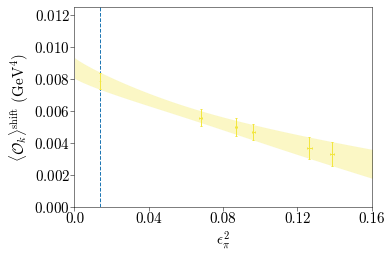

In [19]:
# plot each band individually
# TODO change style to 'talk' and implement sizing for that
rlabels = [r'\mathcal{O}_1', r'\mathcal{O}_2', r'\mathcal{O}_3', r'\mathcal{O}_{1^\prime}', r'\mathcal{O}_{2^\prime}']
extrap_ylims = [[-0.02, -0.005], [-0.04, -0.005], [0.0, 2e-3], [-0.08, -0.02], [0.00, 0.0125]]
style = styles['talk']
for k, key in enumerate(['O1', 'O2', 'O3', 'O1prime', 'O2prime']):
    with sns.plotting_context('paper'):
        asp_ratio = 3/2
        pyplt.figure(figsize = (style['colwidth'], style['colwidth'] / asp_ratio))
        _, caps, _ = pyplt.errorbar(eps_sq_sub_mu, np.array(mat_elems_sub_mu[k]), xerr = eps_sq_sub_sigma, yerr = mat_elems_sub_sigma[k], \
                    c = colors[k], fmt = markers[k], capsize = style['endcaps'], elinewidth = style['ebar_width'], \
                    markersize = style['markersize'])
        pyplt.fill_between(epsilon_sq_range, np.array(band_data_mu[k]) + band_data_sigma[k], np.array(band_data_mu[k]) - band_data_sigma[k], \
                        color = colors[k], alpha = 0.3, linewidth = 0.1)
        for cap in caps:
            cap.set_markeredgewidth(style['ecap_width'])
        pyplt.vlines(eps_sq_0, -0.1, 0.02, linestyles = 'dashed', label = '$(\epsilon^2_\pi)_{\mathrm{PDG}}$', linewidth = style['ebar_width'])
        _, caps, _ = pyplt.errorbar([eps_sq_0], np.array([O_phys_mu[k]]), yerr = np.array([O_phys_sigma[k]]), label = 'MIT', \
                     c = colors[k], fmt = markers[k], capsize = style['endcaps'], markersize = style['markersize'], elinewidth = style['ebar_width'])
        for cap in caps:
            cap.set_markeredgewidth(style['ecap_width'])
        #_, caps, _ = pyplt.errorbar([eps_sq_0], np.array([chipt.callat[key].mean]), yerr = np.array([chipt.callat[key].sdev]), label = 'CalLat', \
        #             c = 'k', fmt = markers[k], capsize = style['endcaps'], markersize = style['markersize'], elinewidth = style['ebar_width'])
        #for cap in caps:
        #    cap.set_markeredgewidth(style['ecap_width'])
        legloc = 'lower right' if k != 4 else 'upper right'
        #pyplt.legend(bbox_to_anchor=(1.0, 0.0), loc=legloc, prop={'size': style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
        #pyplt.legend(loc=legloc, prop={'size': style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
        pyplt.xlim((0.0, 0.16))
        pyplt.xticks([0.0, 0.04, 0.08, 0.12, 0.16])
        pyplt.ylim(extrap_ylims[k])
        pyplt.xticks(fontsize = style['fontsize'])
        pyplt.yticks(fontsize = style['fontsize'])
        pyplt.xlabel('$\epsilon_\pi^2$', fontsize = style['fontsize'])
#         pyplt.ylabel(r'$\langle \pi^+| \, ' + rlabels[k] + r'^{\overline{\mathrm{MS}}} \, |\pi^- \rangle$ (GeV$^4$)', fontsize = style['fontsize'])
        pyplt.ylabel('$\\langle \mathcal{O}_k \\rangle^{\mathrm{shift}}$ (GeV$^4$)', fontsize = style['fontsize'])
        ax = pyplt.gca()
        ax.set_xticklabels(['0.0', '0.04', '0.08', '0.12', '0.16'])
        ax.xaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'], pad = style['bottom_pad'])
        ax.yaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'], pad = style['left_pad'])
        for spine in spinedirs:
            ax.spines[spine].set_linewidth(style['axeswidth'])
        pyplt.tight_layout()
        pyplt.savefig('/Users/theoares/Dropbox (MIT)/research/0nubb/paper/plots/chi_extrap/' + key + '.pdf', bbox_inches='tight')
        pyplt.show()

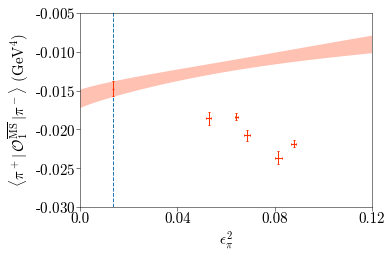

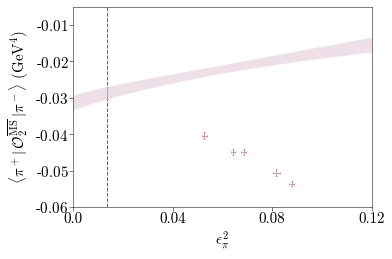

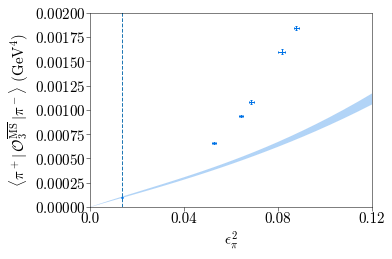

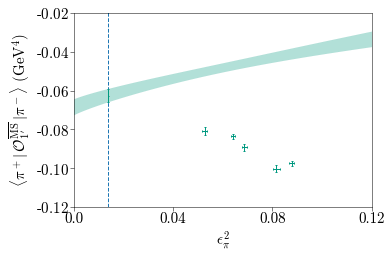

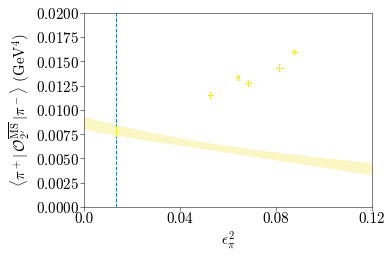

In [20]:
# plot each band individually
# TODO change style to 'talk' and implement sizing for that
rlabels = [r'\mathcal{O}_1', r'\mathcal{O}_2', r'\mathcal{O}_3', r'\mathcal{O}_{1^\prime}', r'\mathcal{O}_{2^\prime}']
unsub_ylims = [[-0.03, -0.005], [-0.06, -0.005], [0.0, 2e-3], [-0.12, -0.02], [0.00, 0.02]]
style = styles['talk']
for k, key in enumerate(['O1', 'O2', 'O3', 'O1prime', 'O2prime']):
    with sns.plotting_context('paper'):
        asp_ratio = 3/2
        pyplt.figure(figsize = (style['colwidth'], style['colwidth'] / asp_ratio))
        _, caps, _ = pyplt.errorbar(eps_sq_mu, np.array(mat_elems_mu[k]), xerr = eps_sq_sigma, yerr = mat_elems_sigma[k], \
                    c = colors[k], fmt = markers[k], capsize = style['endcaps'], elinewidth = style['ebar_width'], \
                    markersize = style['markersize'])
        pyplt.fill_between(epsilon_sq_range, np.array(band_data_mu[k]) + band_data_sigma[k], np.array(band_data_mu[k]) - band_data_sigma[k], \
                        color = colors[k], alpha = 0.3, linewidth = 0.1)
        for cap in caps:
            cap.set_markeredgewidth(style['ecap_width'])
        pyplt.vlines(eps_sq_0, -0.2, 0.02, linestyles = 'dashed', label = '$(\epsilon^2_\pi)_{\mathrm{PDG}}$', linewidth = style['ebar_width'])
        _, caps, _ = pyplt.errorbar([eps_sq_0], np.array([O_phys_mu[k]]), yerr = np.array([O_phys_sigma[k]]), label = 'MIT', \
                     c = colors[k], fmt = markers[k], capsize = style['endcaps'], markersize = style['markersize'], elinewidth = style['ebar_width'])
        for cap in caps:
            cap.set_markeredgewidth(style['ecap_width'])
        #_, caps, _ = pyplt.errorbar([eps_sq_0], np.array([chipt.callat[key].mean]), yerr = np.array([chipt.callat[key].sdev]), label = 'CalLat', \
        #             c = 'k', fmt = markers[k], capsize = style['endcaps'], markersize = style['markersize'], elinewidth = style['ebar_width'])
        #for cap in caps:
        #    cap.set_markeredgewidth(style['ecap_width'])
        legloc = 'lower right' if k != 4 else 'upper right'
        #pyplt.legend(bbox_to_anchor=(1.0, 0.0), loc=legloc, prop={'size': style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
        #pyplt.legend(loc=legloc, prop={'size': style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
        pyplt.xlim((0.0, 0.12))
        pyplt.xticks([0.0, 0.04, 0.08, 0.12])
        pyplt.ylim(unsub_ylims[k])
        pyplt.xticks(fontsize = style['fontsize'])
        pyplt.yticks(fontsize = style['fontsize'])
        pyplt.xlabel('$\epsilon_\pi^2$', fontsize = style['fontsize'])
        pyplt.ylabel(r'$\langle \pi^+| \, ' + rlabels[k] + r'^{\overline{\mathrm{MS}}} \, |\pi^- \rangle$ (GeV$^4$)', fontsize = style['fontsize'])
        ax = pyplt.gca()
        ax.set_xticklabels(['0.0', '0.04', '0.08', '0.12'])
        ax.xaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'], pad = style['bottom_pad'])
        ax.yaxis.set_tick_params(width = style['tickwidth'], length = style['ticklength'], pad = style['left_pad'])
        for spine in spinedirs:
            ax.spines[spine].set_linewidth(style['axeswidth'])
        pyplt.tight_layout()
        pyplt.savefig('/Users/theoares/Dropbox (MIT)/research/0nubb/paper/plots/chi_extrap/' + key + '_unshifted.pdf', bbox_inches='tight')
        pyplt.show()

Operator O1 difference (MIT - CalLat) / max(σ_MIT, σ_CalLat) is: 1.9035377090840715


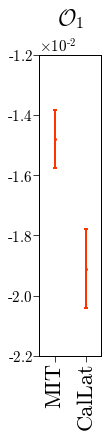

Operator O2 difference (MIT - CalLat) / max(σ_MIT, σ_CalLat) is: 1.6999726695383675


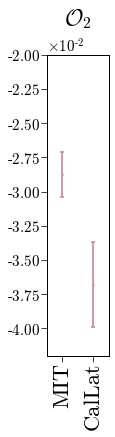

Operator O3 difference (MIT - CalLat) / max(σ_MIT, σ_CalLat) is: 6.35325952898372


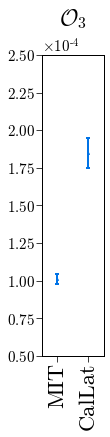

Operator O1prime difference (MIT - CalLat) / max(σ_MIT, σ_CalLat) is: 1.1690958170274275


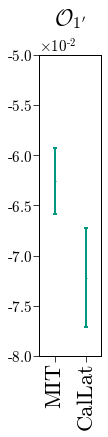

Operator O2prime difference (MIT - CalLat) / max(σ_MIT, σ_CalLat) is: 2.453640498255768


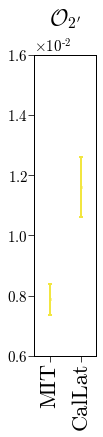

In [21]:
# plot each band vs callat
comp_extrap_ylims = [[-0.022, -0.012], [-0.042, -0.02], [5e-5, 2.5e-4], [-0.08, -0.05], [0.006, 0.016]]
style = styles['talk']
scale = 1.
# scale = np.sqrt(2)
for k, key in enumerate(['O1', 'O2', 'O3', 'O1prime', 'O2prime']):
    with sns.plotting_context('paper'):
        print('Operator ' + key + ' difference (MIT - CalLat) / max(σ_MIT, σ_CalLat) is: ' \
              + str(np.abs(scale * O_phys_mu[k] - chipt.callat[key].mean) / (O_phys_sigma[k] + chipt.callat[key].sdev)))
        pyplt.figure(figsize = (style['colwidth'] / 5, style['colwidth']))
        #pyplt.fill_between(epsilon_sq_range, np.array(band_data_mu[k]) + band_data_sigma[k], np.array(band_data_mu[k]) - band_data_sigma[k], \
        #                color = colors[k], alpha = 0.3, linewidth = 0.1)
        #for cap in caps:
        #    cap.set_markeredgewidth(style['ecap_width'])
        _, caps, _ = pyplt.errorbar([0.], np.array([scale * O_phys_mu[k]]), yerr = np.array([scale * O_phys_sigma[k]]), label = 'MIT', \
                     c = colors[k], fmt = markers[k], capsize = 2*style['endcaps'], markersize = 2*style['markersize'], elinewidth = 2*style['ebar_width'])
        for cap in caps:
            cap.set_markeredgewidth(2*style['ecap_width'])
        _, caps, _ = pyplt.errorbar([1.], np.array([chipt.callat[key].mean]), yerr = np.array([chipt.callat[key].sdev]), label = 'CalLat', \
                     c = colors[k], fmt = markers[k], capsize = 2*style['endcaps'], markersize = 2*style['markersize'], elinewidth = 2*style['ebar_width'])
        for cap in caps:
            cap.set_markeredgewidth(2*style['ecap_width'])
        legloc = 'lower right'# if k != 4 else 'upper right'
        #pyplt.legend(loc=legloc, prop={'size': style['fontsize']}, ncol = 3, handletextpad = 0.2, columnspacing = 0.1)
        pyplt.xlim((-0.5, 1.5))
        pyplt.xticks([0, 1])
        pyplt.ylim(comp_extrap_ylims[k])
        pyplt.xticks(fontsize = 1.5*style['fontsize'], rotation = 90)
        pyplt.yticks(fontsize = style['fontsize'])
        pyplt.title(r'$' + rlabels[k] + r'$', fontsize = 1.5*style['fontsize'], y = 1.08)
        ax = pyplt.gca()
        ax.set_xticklabels(['MIT', 'CalLat'])
        ax.xaxis.set_tick_params(width = 1.5*style['tickwidth'], length = 1.5*style['ticklength'], pad = style['left_pad'])
        ax.yaxis.set_tick_params(width = 1.5*style['tickwidth'], length = 1.5*style['ticklength'], pad = style['bottom_pad'])
        ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
        ax.yaxis.get_offset_text().set_fontsize(style['fontsize'])
        #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
        #for spine in spinedirs:
        #    ax.spines[spine].set_linewidth(style['axeswidth'])
        #pyplt.tight_layout()
        pyplt.savefig('/Users/theoares/Dropbox (MIT)/research/0nubb/paper/plots/chi_extrap/comparisons/' + key + '_comp.pdf', bbox_inches='tight')
        pyplt.show()

In [22]:
callat_bag = gv.gvar('0.421(23)')
mit_bag = callat_bag * results['O3'] / chipt.callat['O3']
print('MIT bag parameter with our data: ' + str(mit_bag))

MIT bag parameter with our data: 0.229(19)


In [23]:
results

{'O1': -0.01479(96),
 'O2': -0.0287(16),
 'O3': 0.0001008(33),
 'O1prime': -0.0626(33),
 'O2prime': 0.00788(52)}

About a 6\% error in total after the extrapolation. Most of that comes from the chiral extrapolation: the statistical error on the renormalized matrix elements is about 2\%. 
- Full error: 6\%
- Statistical error (renormalized matrix elements): 2\%
    - Renormalization: 0.5\%
    - Bare matrix elements: A bit under 2\%

In [24]:
data2['O1'][0].sdev / data2['O1'][0].mean

-0.022005642177779783

In [25]:
for key in ['O1', 'O2', 'O3', 'O1prime', 'O2prime']:
    print(key)
    print('Full error: ' + str(np.abs(results[key].sdev / results[key].mean)))
    print('Error on renorm mat elems: ' + str(np.abs(data2[key][0].sdev / data2[key][0].mean)))

O1
Full error: 0.06521350903335008
Error on renorm mat elems: 0.022005642177779783
O2
Full error: 0.056904637027180884
Error on renorm mat elems: 0.01278360799221573
O3
Full error: 0.03229286968846362
Error on renorm mat elems: 0.012666593372378422
O1prime
Full error: 0.05315491945603816
Error on renorm mat elems: 0.014155325910005758
O2prime
Full error: 0.06557225374058895
Error on renorm mat elems: 0.014127520087140731
